# **Exercise 01: line chart with styles**

Prepare the project:

In [1]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import allowed modules:

In [3]:
import sqlite3

import pandas as pd

Import allowed entities:

In [4]:
from pandas import DataFrame
from sqlite3 import Connection
from matplotlib.axes._axes import Axes

Create a dictionary for connection to the database:

In [5]:
conn_params: dict = {"db_file": "checking_logs.sqlite", "db_file_path": "../../data/", }

Make a connection to the [database](https://drive.google.com/open?id=1zQ8AR2Ry3ajzB3UZO1Sfk3xtDJlzQF2M):

In [6]:
conn: Connection = sqlite3.connect(conn_params["db_file_path"] + conn_params["db_file"], )

Check connection:

In [7]:
conn.cursor().execute("SELECT 123;", );

## Analyze only the users and not the admins.
## Analyze only the dates when there were both views and checker commits:

Create a queries:

In [8]:
sql_views_q: str = """
                   SELECT
                       pageviews.datetime AS datetime
                   FROM
                       pageviews
                   WHERE
                       pageviews.uid LIKE 'user_%';
                   """

sql_commits_q: str = """
                     SELECT
                         checker.timestamp AS datetime
                     FROM
                         checker
                     WHERE
                         checker.uid LIKE 'user_%';
                     """

Run a queries:

In [9]:
views: DataFrame = pd.io.sql.read_sql(
    sql_views_q,
    conn,
    parse_dates=["datetime", ],
)

commits: DataFrame = pd.io.sql.read_sql(
    sql_commits_q,
    conn,
    parse_dates=["datetime", ],
)

Chech results:

In [10]:
views.head()

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144


In [11]:
commits.head()

,datetime
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


Prepare `views` and `commits` data for a visualization:

In [12]:
views["date"] = views["datetime"].dt.date
commits["date"] = commits["datetime"].dt.date

In [13]:
views = views.groupby("date", ).size().reset_index(name="views", )
commits = commits.groupby("date", ).size().reset_index(name="commits", )

Check them:

In [14]:
views.head()

,date,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1


In [15]:
commits.head()

,date,commits
0,2020-04-17,23
1,2020-04-18,69
2,2020-04-19,33
3,2020-04-20,25
4,2020-04-21,25


Find when commit and view were at the same day:

In [16]:
df: DataFrame = pd.merge(
    views,
    commits,
    on="date",
    how="inner",
)

Check it:

In [17]:
df.head()

,date,views,commits
0,2020-04-17,1,23
1,2020-04-18,23,69
2,2020-04-19,15,33
3,2020-04-21,3,25
4,2020-04-22,1,28


## Use size of the font should be `8`.

## The size of the figure is `(16, 8)`:

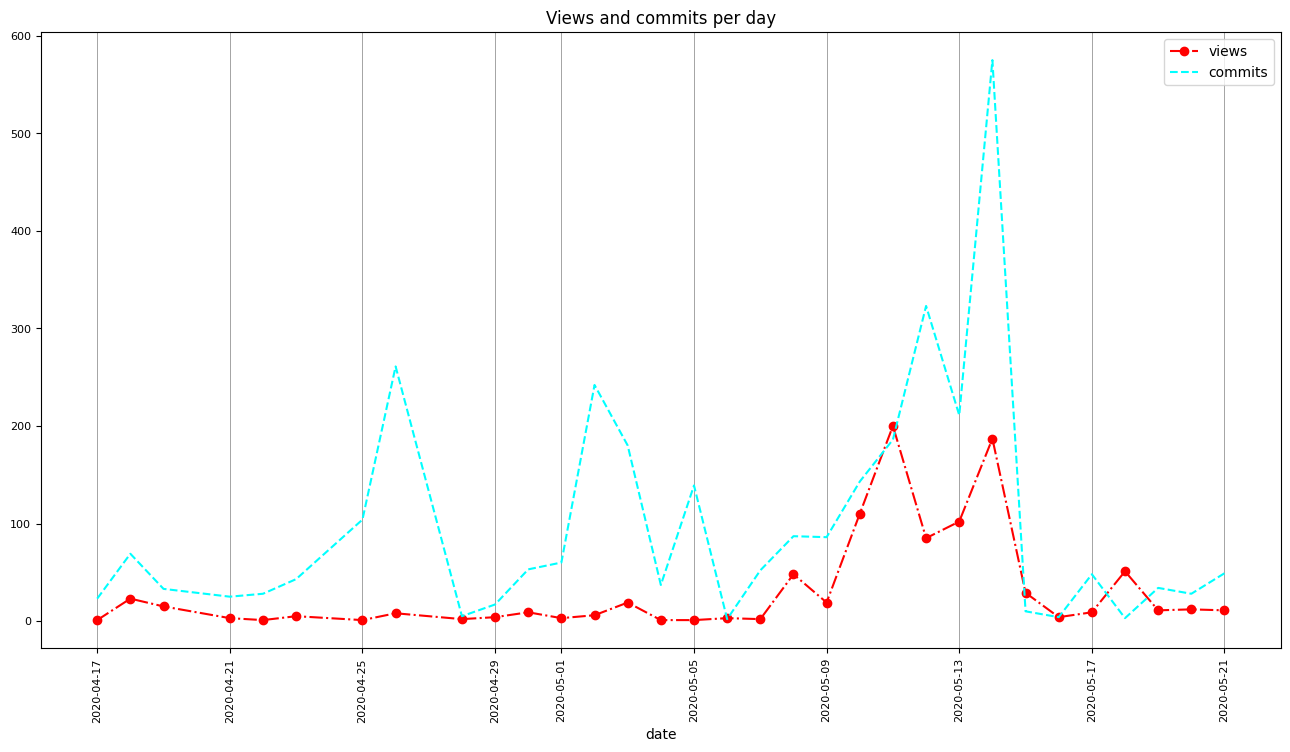

In [18]:
ax: Axes = df.plot(
    x="date",
    style=["o-.", "--", ],
    color=["red", "cyan", ],
    fontsize=8,
    figsize=(16, 8, ),
    legend=["views", "commits", ],
    title="Views and commits per day",
    rot=90,
)
ax.grid(
    visible=True,
    axis='x',
    color="grey",
    linestyle='-',
    linewidth=0.5,
)

## At the end of *Jupyter Notebook* create a markdown cell and insert the question: `"How many times was the number of views larger than 150?"`:

In [19]:
print(f"The answer is {df[df["views"] > 150].shape[0]}.", )

The answer is 2.


Close the connection to the database:

In [20]:
conn.close()